## **1- Import Libraries**

In [16]:
!pip install opencv-python

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.utils import to_categorical
import cv2

## **2- Load Dataset**

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
cifar_data = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar_data.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

## **3- Data visualization**

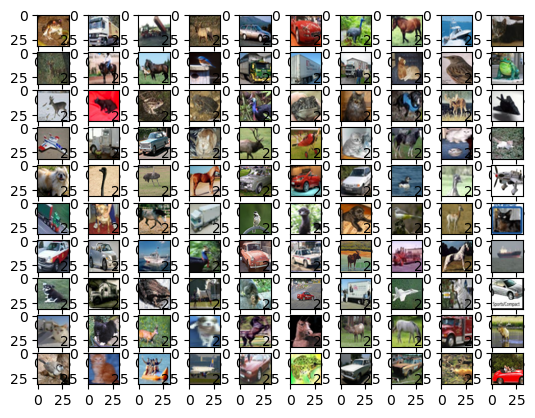

In [8]:
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k +=1
plt.show()

## **4- Data Preprocessing**

In [9]:
y_train[9]

array([3], dtype=uint8)

In [10]:
y_test[7]

array([6], dtype=uint8)

In [12]:
classes = len(np.unique(y_train))
classes

10

In [13]:
#return label to category
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [ ]:
x_train  ---> (50000, 32, 32, 3)
x_test ---> (10000, 32, 32, 3)

In [18]:
x_train.shape[0]

50000

In [19]:
def resize_image(img):
    number_images = img.shape[0]
    new_images = np.zeros((number_images, 48, 48, 3))
    for i in range(number_images):
        new_images[i] = cv2.resize(img[i, :, :, :], (48, 48))
    return new_images

In [20]:
x_train =  resize_image(x_train)
x_test = resize_image(x_test)

In [21]:
x_train.shape

(50000, 48, 48, 3)

In [22]:
x_test.shape

(10000, 48, 48, 3)

In [24]:
#scaling
x_train = x_train / 255

In [25]:
x_test = x_test /255

In [26]:
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.61960784, 0.43529412, 0.18823529],
        [0.62745098, 0.43921569, 0.18431373],
        ...,
        [0.50196078, 0.36078431, 0.14117647],
        [0.4745098 , 0.34509804, 0.13333333],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.60784314, 0.43921569, 0.19607843],
        [0.60784314, 0.43529412, 0.18431373],
        [0.61176471, 0.43529412, 0.17254902],
        ...,
        [0.49803922, 0.36078431, 0.13333333],
        [0.47843137, 0.34901961, 0.13333333],
        [0.4627451 , 0.34117647, 0.13333333]],

       [[0.59607843, 0.43921569, 0.19607843],
        [0.59215686, 0.43529412, 0.17254902],
        [0.59607843, 0.43137255, 0.15686275],
        ...,
        [0.49803922, 0.36078431, 0.1254902 ],
        [0.47843137, 0.35294118, 0.12941176],
        [0.46666667, 0.34509804, 0.13333333]],

       ...,

       [[0.24313725, 0.45882353, 0.6627451 ],
        [0.21568627, 0.42745098, 0.62352941],
        [0.17647059, 0

## **5- Model Building**

In [29]:
model = Sequential()

#input layer ---> Flatten Layer 
model.add(tf.keras.layers.Flatten())

#hidden layer ---> Dense Layer with 128 with relu activation
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

#hidden layer ---> Dense Layer with 64 with relu activation
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))

#hidden layer ---> Dense Layer with 64 with relu activation
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))

#output layer ---> Dense Layer with 10 classes and softmax activation
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))

## **6- Model Compile**

In [30]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

## **7- Fit model**

In [31]:
model_history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 46s 34ms/step - loss: 1.9078 - accuracy: 0.3072 - val_loss: 1.8109 - val_accuracy: 0.3446
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.7430 - accuracy: 0.3720 - val_loss: 1.7129 - val_accuracy: 0.3839
Epoch 3/10
1250/1250 [==============================] - 37s 29ms/step - loss: 1.6773 - accuracy: 0.3975 - val_loss: 1.6828 - val_accuracy: 0.4004
Epoch 4/10
1250/1250 [==============================] - 28s 22ms/step - loss: 1.6306 - accuracy: 0.4131 - val_loss: 1.6556 - val_accuracy: 0.4062
Epoch 5/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5974 - accuracy: 0.4256 - val_loss: 1.6836 - val_accuracy: 0.4046
Epoch 6/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.5668 - accuracy: 0.4370 - val_loss: 1.6150 - val_accuracy: 0.4208
Epoch 7/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.5514 - accuracy: 0.4426 - val_loss: 1.5755 -

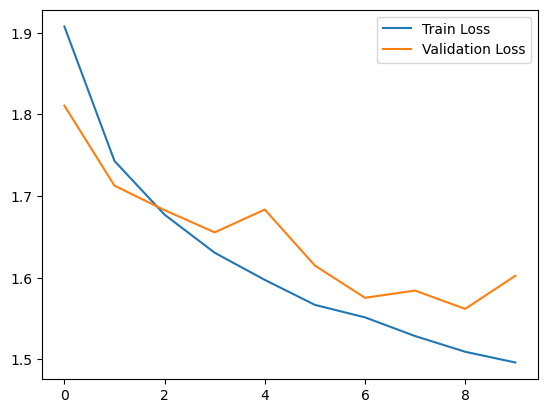

In [32]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

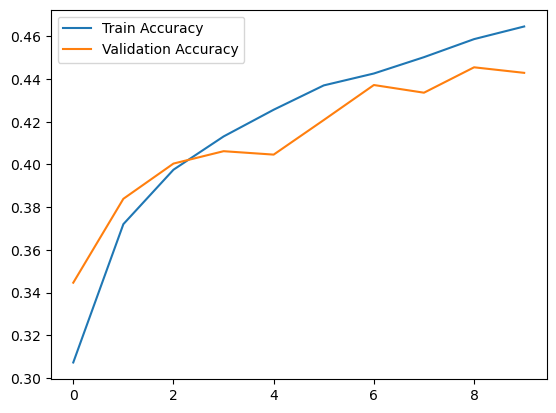

In [33]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## **8- Model Eavaluation**

In [34]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.5162 - accuracy: 0.4660


In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5674 - accuracy: 0.4521


In [ ]:
#best performance ---> train with many number of epochs